# Among which age groups are immigrants, non-immigrants, and non-permanent residents most prevalent?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib.pyplot import figure

In [2]:
file = Path("resources/Data for project_1.csv")
file_df = pd.read_csv(file)

df1 = file_df.dropna(subset=["Column1"])

df1["Regions"] = df1["GEO"].astype(str) +","+ df1["Column1"]
df1 = df1[df1["Age (15C)"].str.contains("Total - Age") == False]
df1 = df1[df1["Gender (3)"].str.contains("Total - Gender") == False]
df1 = df1.loc[df1['Statistics (2)'] == "2021 Counts"]
df1 = df1.drop(columns=['Symbol','Symbol2','Symbol3','Symbol4','Symbol5','Symbol6','Symbol7','Symbol8','Symbol9','GEO','Column1','Coordinate', 'Statistics (2)','REF_DATE'])
df1 = df1[df1['Regions'].str.endswith(', Ont.')]
df1 = df1.rename(columns = lambda x: x.replace('Immigrant status and period of immigration (9):', ''))
df1 = pd.DataFrame(df1)
df1.columns = ['Age','Gender', 'Total - Immigrant status and period of immigration', 'Non-immigrants','Immigrants', 'Before 2001', '2001 to 2005',
              '2006 to 2010', '2011 to 2015','2016 to 2021','Non-permanent residents','Regions']

df1

C:\Users\sanji\AppData\Local\Temp\ipykernel_23948\1352210231.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Regions"] = df1["GEO"].astype(str) +","+ df1["Column1"]


,Age,Gender,Total - Immigrant status and period of immigration,Non-immigrants,Immigrants,Before 2001,2001 to 2005,2006 to 2010,2011 to 2015,2016 to 2021,Non-permanent residents,Regions
5048,0 to 14 years,Men+,18675.0,17805.0,705.0,0.0,0.0,40.0,270.0,400.0,160.0,"Barrie (CMA), Ont."
5050,0 to 14 years,Women+,17470.0,16820.0,515.0,0.0,0.0,35.0,205.0,280.0,135.0,"Barrie (CMA), Ont."
5054,15 years and over,Men+,85295.0,67375.0,16115.0,9565.0,1680.0,1670.0,1535.0,1660.0,1805.0,"Barrie (CMA), Ont."
5056,15 years and over,Women+,88715.0,69400.0,18005.0,10835.0,1780.0,1800.0,1775.0,1815.0,1310.0,"Barrie (CMA), Ont."
5060,15 to 24 years,Men+,13745.0,11985.0,870.0,35.0,160.0,250.0,230.0,200.0,890.0,"Barrie (CMA), Ont."
...,...,...,...,...,...,...,...,...,...,...,...,...
9256,65 years and over,Women+,4760.0,3640.0,1120.0,1050.0,10.0,25.0,25.0,10.0,0.0,"Woodstock (CA), Ont."
9260,65 to 74 years,Men+,2205.0,1700.0,505.0,455.0,0.0,15.0,20.0,10.0,0.0,"Woodstock (CA), Ont."
9262,65 to 74 years,Women+,2690.0,2130.0,560.0,510.0,0.0,25.0,20.0,0.0,0.0,"Woodstock (CA), Ont."
9266,75 years and over,Men+,1605.0,1090.0,515.0,485.0,20.0,10.0,0.0,0.0,0.0,"Woodstock (CA), Ont."


In [3]:
print(df1.columns)
df1

Index(['Age', 'Gender', 'Total - Immigrant status and period of immigration',
       'Non-immigrants', 'Immigrants', 'Before 2001', '2001 to 2005',
       '2006 to 2010', '2011 to 2015', '2016 to 2021',
       'Non-permanent residents', 'Regions'],
      dtype='object')


,Age,Gender,Total - Immigrant status and period of immigration,Non-immigrants,Immigrants,Before 2001,2001 to 2005,2006 to 2010,2011 to 2015,2016 to 2021,Non-permanent residents,Regions
5048,0 to 14 years,Men+,18675.0,17805.0,705.0,0.0,0.0,40.0,270.0,400.0,160.0,"Barrie (CMA), Ont."
5050,0 to 14 years,Women+,17470.0,16820.0,515.0,0.0,0.0,35.0,205.0,280.0,135.0,"Barrie (CMA), Ont."
5054,15 years and over,Men+,85295.0,67375.0,16115.0,9565.0,1680.0,1670.0,1535.0,1660.0,1805.0,"Barrie (CMA), Ont."
5056,15 years and over,Women+,88715.0,69400.0,18005.0,10835.0,1780.0,1800.0,1775.0,1815.0,1310.0,"Barrie (CMA), Ont."
5060,15 to 24 years,Men+,13745.0,11985.0,870.0,35.0,160.0,250.0,230.0,200.0,890.0,"Barrie (CMA), Ont."
...,...,...,...,...,...,...,...,...,...,...,...,...
9256,65 years and over,Women+,4760.0,3640.0,1120.0,1050.0,10.0,25.0,25.0,10.0,0.0,"Woodstock (CA), Ont."
9260,65 to 74 years,Men+,2205.0,1700.0,505.0,455.0,0.0,15.0,20.0,10.0,0.0,"Woodstock (CA), Ont."
9262,65 to 74 years,Women+,2690.0,2130.0,560.0,510.0,0.0,25.0,20.0,0.0,0.0,"Woodstock (CA), Ont."
9266,75 years and over,Men+,1605.0,1090.0,515.0,485.0,20.0,10.0,0.0,0.0,0.0,"Woodstock (CA), Ont."


In [4]:
print(df1['Age'].unique())

['0 to 14 years' '15 years and over' '15 to 24 years' '15 to 19 years'
 '20 to 24 years' '25 to 64 years' '25 to 54 years' '25 to 34 years'
 '35 to 44 years' '45 to 54 years' '55 to 64 years' '65 years and over'
 '65 to 74 years' '75 years and over']


In [45]:
d= {'Total - Immigrant status and period of immigration': 'sum',
   'Non-immigrants': 'sum',
   'Immigrants': 'sum',
   'Before 2001': 'sum',
   '2001 to 2005': 'sum',
   '2006 to 2010' : 'sum',
   '2011 to 2015' : 'sum',
   '2016 to 2021': 'sum',
   'Non-permanent residents' : 'sum'
   }

df2 = df1.groupby(['Age'], as_index=False).aggregate(d)
df2

,Age,Total - Immigrant status and period of immigration,Non-immigrants,Immigrants,Before 2001,2001 to 2005,2006 to 2010,2011 to 2015,2016 to 2021,Non-permanent residents
0,0 to 14 years,"2,023,010","1,830,370","155,825",0,0,"12,990","47,470","95,260","36,780"
1,15 to 19 years,"725,715","595,110","108,085",0,"13,820","32,600","32,145","29,330","22,385"
2,15 to 24 years,"1,548,665","1,171,520","259,215","11,715","55,300","68,130","62,425","61,415","117,895"
3,15 years and over,"10,607,935","6,313,940","3,946,585","2,139,230","478,685","437,260","408,025","483,390","347,405"
4,20 to 24 years,"822,950","576,370","151,060","11,715","41,360","35,490","30,250","32,010","95,415"
5,25 to 34 years,"1,796,375","1,120,465","537,075","116,390","75,420","67,850","79,870","197,410","138,875"
6,25 to 54 years,"5,132,765","2,984,455","1,930,045","698,675","297,910","280,475","280,000","372,985","218,240"
7,25 to 64 years,"6,877,250","4,006,125","2,646,075","1,234,295","375,690","330,660","310,675","394,815","224,985"
8,35 to 44 years,"1,677,520","948,145","673,220","209,565","86,825","115,935","130,270","130,585","56,145"
9,45 to 54 years,"1,658,830","915,795","719,835","372,775","135,630","96,640","69,745","44,920","23,210"


In [46]:
pd.options.display.float_format = '{:,.0f}'.format
df2

,Age,Total - Immigrant status and period of immigration,Non-immigrants,Immigrants,Before 2001,2001 to 2005,2006 to 2010,2011 to 2015,2016 to 2021,Non-permanent residents
0,0 to 14 years,"2,023,010","1,830,370","155,825",0,0,"12,990","47,470","95,260","36,780"
1,15 to 19 years,"725,715","595,110","108,085",0,"13,820","32,600","32,145","29,330","22,385"
2,15 to 24 years,"1,548,665","1,171,520","259,215","11,715","55,300","68,130","62,425","61,415","117,895"
3,15 years and over,"10,607,935","6,313,940","3,946,585","2,139,230","478,685","437,260","408,025","483,390","347,405"
4,20 to 24 years,"822,950","576,370","151,060","11,715","41,360","35,490","30,250","32,010","95,415"
5,25 to 34 years,"1,796,375","1,120,465","537,075","116,390","75,420","67,850","79,870","197,410","138,875"
6,25 to 54 years,"5,132,765","2,984,455","1,930,045","698,675","297,910","280,475","280,000","372,985","218,240"
7,25 to 64 years,"6,877,250","4,006,125","2,646,075","1,234,295","375,690","330,660","310,675","394,815","224,985"
8,35 to 44 years,"1,677,520","948,145","673,220","209,565","86,825","115,935","130,270","130,585","56,145"
9,45 to 54 years,"1,658,830","915,795","719,835","372,775","135,630","96,640","69,745","44,920","23,210"


Text(0.5, 1.0, 'Immigrants by age ')

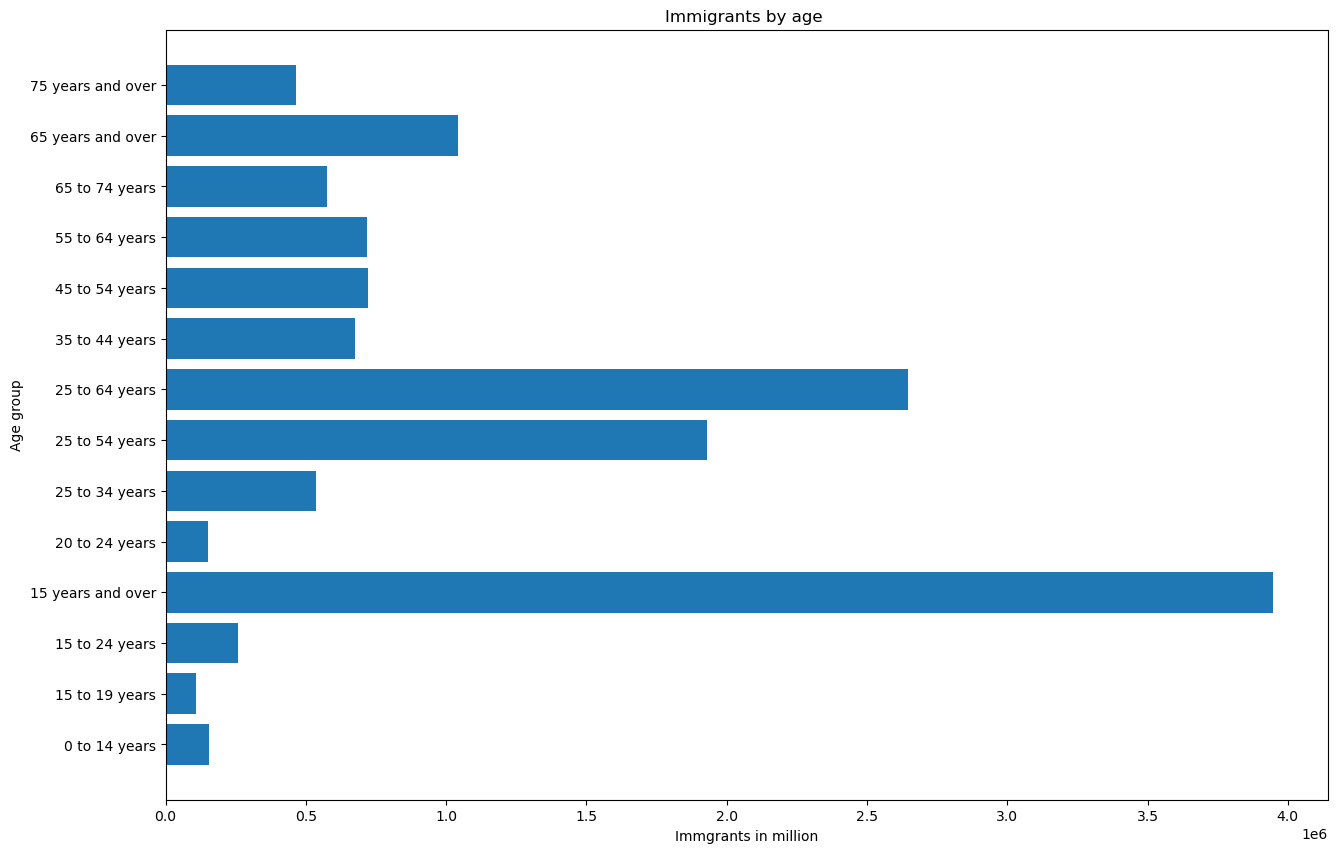

In [47]:
age = df2["Age"]
Immigrants = df2["Immigrants"]

fig = plt.figure(figsize=(15,10))
plt.barh(age,Immigrants)
plt.xlabel("Immgrants in million")
plt.ylabel("Age group")
plt.title("Immigrants by age ")

Text(0.5, 1.0, 'Non-immigrants by age ')

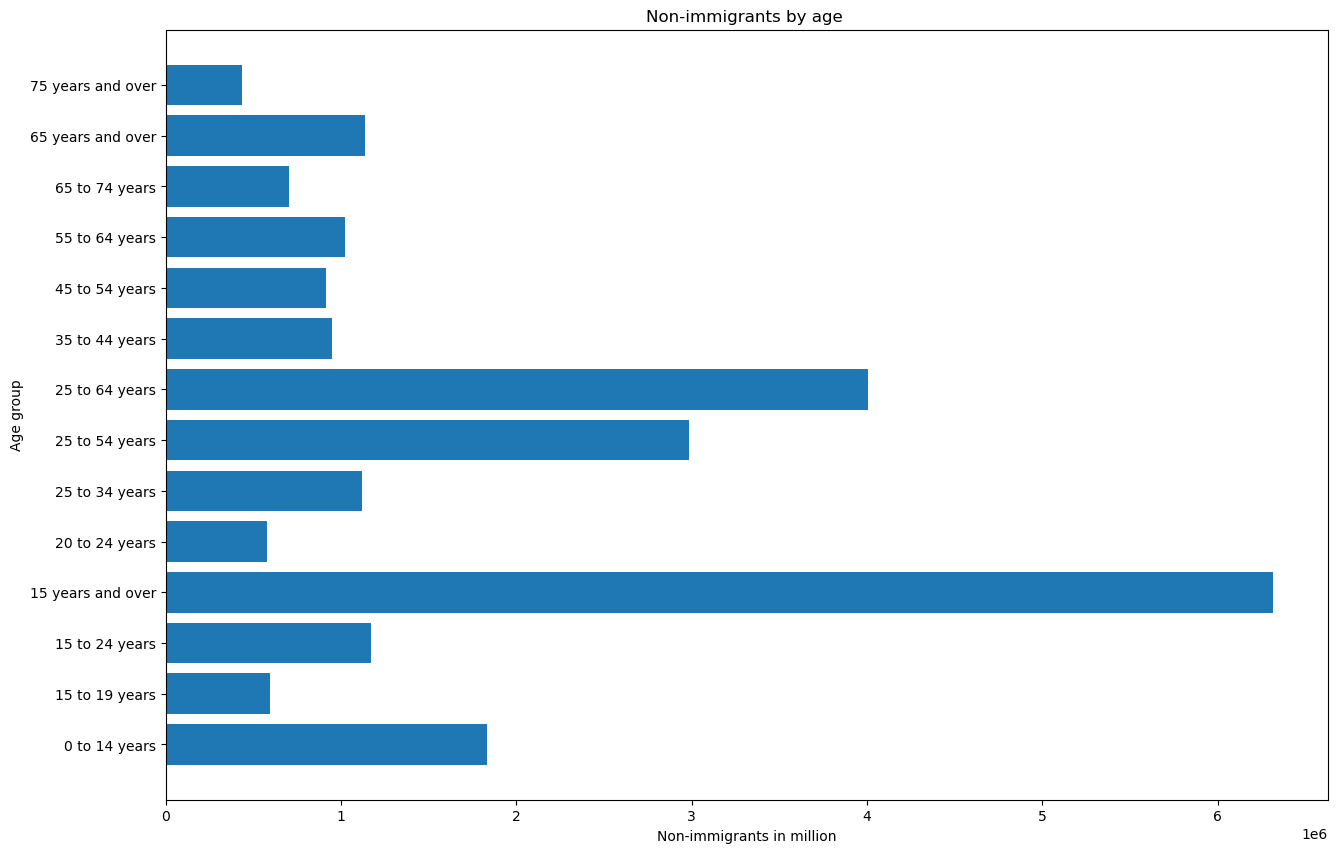

In [48]:
age = df2["Age"]
Immigrants = df2["Non-immigrants"]

fig = plt.figure(figsize=(15,10))
plt.barh(age,Immigrants)
plt.xlabel("Non-immigrants in million")
plt.ylabel("Age group")
plt.title("Non-immigrants by age ")

Text(0.5, 1.0, 'Non-permanent residents by age ')

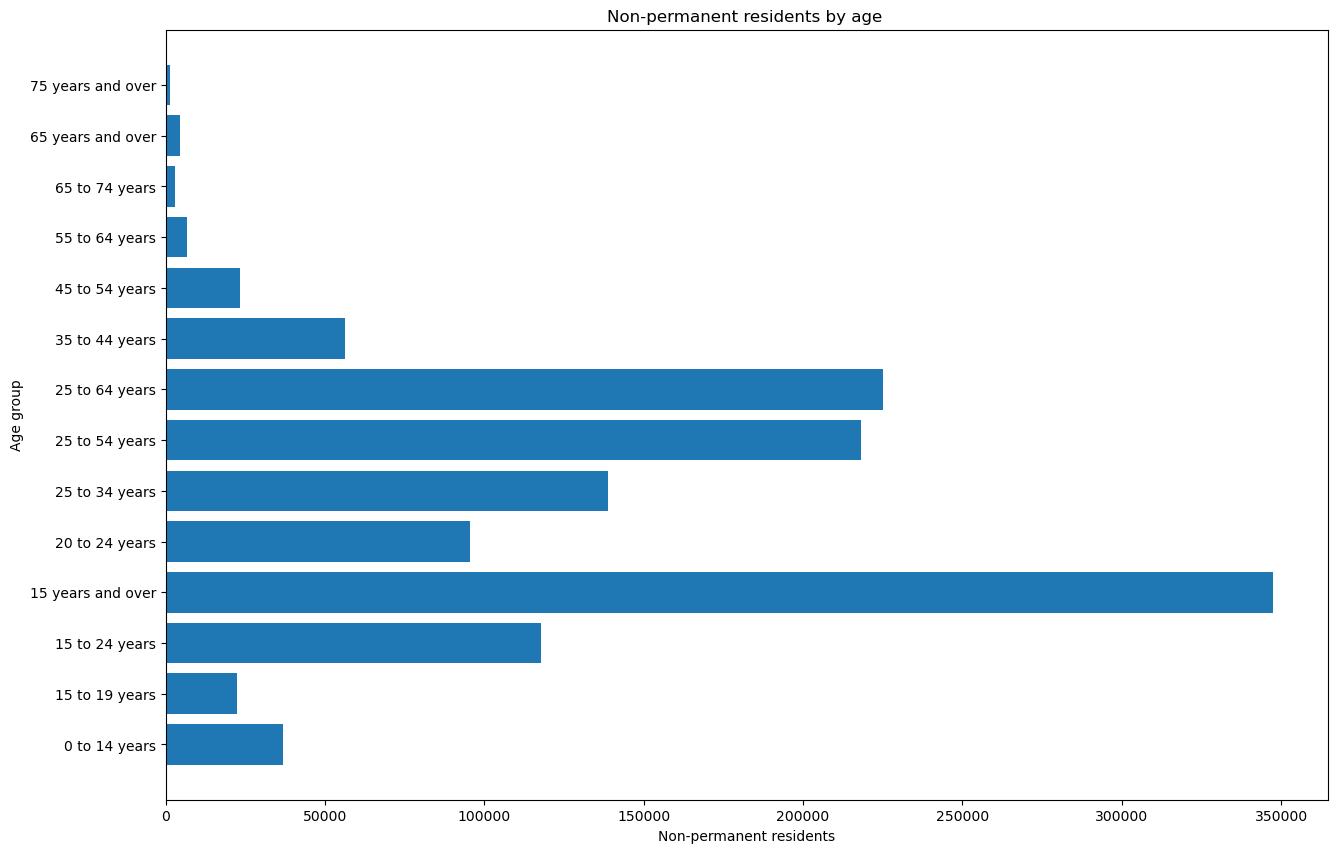

In [56]:
age = df2["Age"]
Immigrants = df2["Non-permanent residents"]


fig = plt.figure(figsize=(15,10))
plt.barh(age,Immigrants)

plt.xlabel("Non-permanent residents")
plt.ylabel("Age group")
plt.title("Non-permanent residents by age ")

In [84]:
d= {'Total - Immigrant status and period of immigration': 'sum',
   'Non-immigrants': 'sum',
   'Immigrants': 'sum',
   'Before 2001': 'sum',
   '2001 to 2005': 'sum',
   '2006 to 2010' : 'sum',
   '2011 to 2015' : 'sum',
   '2016 to 2021': 'sum',
   'Non-permanent residents' : 'sum'
   }

df3 = df1.groupby(['Regions','Age'],as_index=False).aggregate(d)
df3

,Regions,Age,Total - Immigrant status and period of immigration,Non-immigrants,Immigrants,Before 2001,2001 to 2005,2006 to 2010,2011 to 2015,2016 to 2021,Non-permanent residents
0,"Barrie (CMA), Ont.",0 to 14 years,"36,145","34,625","1,220",0,0,75,475,680,295
1,"Barrie (CMA), Ont.",15 to 19 years,"13,150","12,185",770,0,85,275,225,180,195
2,"Barrie (CMA), Ont.",15 to 24 years,"26,365","23,295","1,690",60,310,490,415,420,"1,375"
3,"Barrie (CMA), Ont.",15 years and over,"174,010","136,775","34,120","20,400","3,460","3,470","3,310","3,475","3,115"
4,"Barrie (CMA), Ont.",20 to 24 years,"13,215","11,115",920,60,225,215,190,235,"1,180"
...,...,...,...,...,...,...,...,...,...,...,...
597,"Woodstock (CA), Ont.",45 to 54 years,"5,320","4,385",910,490,125,140,85,60,30
598,"Woodstock (CA), Ont.",55 to 64 years,"6,160","5,210",935,700,45,85,60,35,0
599,"Woodstock (CA), Ont.",65 to 74 years,"4,895","3,830","1,065",965,0,40,40,10,0
600,"Woodstock (CA), Ont.",65 years and over,"8,570","6,435","2,140","1,990",30,50,55,20,0


In [85]:
print(df3['Regions'].unique())

['Barrie (CMA), Ont.' 'Belleville - Quinte West (CMA), Ont.'
 'Brantford (CMA), Ont.' 'Brockville (CA), Ont.'
 'Centre Wellington (CA), Ont.' 'Chatham-Kent (CA), Ont.'
 'Cobourg (CA), Ont.' 'Collingwood (CA), Ont.' 'Cornwall (CA), Ont.'
 'Elliot Lake (CA), Ont.' 'Essa (CA), Ont.' 'Greater Sudbury (CMA), Ont.'
 'Guelph (CMA), Ont.' 'Hamilton (CMA), Ont.'
 'Hawkesbury (Ontario part) (CA), Ont.' 'Ingersoll (CA), Ont.'
 'Kawartha Lakes (CA), Ont.' 'Kenora (CA), Ont.' 'Kingston (CMA), Ont.'
 'Kitchener - Cambridge - Waterloo (CMA), Ont.' 'London (CMA), Ont.'
 'Midland (CA), Ont.' 'Norfolk (CA), Ont.' 'North Bay (CA), Ont.'
 'Orillia (CA), Ont.' 'Oshawa (CMA), Ont.'
 'Ottawa - Gatineau (Ontario part) (CMA), Ont.' 'Owen Sound (CA), Ont.'
 'Pembroke (CA), Ont.' 'Petawawa (CA), Ont.' 'Peterborough (CMA), Ont.'
 'Port Hope (CA), Ont.' 'Sarnia (CA), Ont.' 'Sault Ste. Marie (CA), Ont.'
 'St. Catharines - Niagara (CMA), Ont.' 'Stratford (CA), Ont.'
 'Thunder Bay (CMA), Ont.' 'Tillsonburg (CA), Ont.

In [87]:
df4 = df3[df3['Regions'].str.contains('Toronto') == True]
df4

,Regions,Age,Total - Immigrant status and period of immigration,Non-immigrants,Immigrants,Before 2001,2001 to 2005,2006 to 2010,2011 to 2015,2016 to 2021,Non-permanent residents
546,"Toronto (CMA), Ont.",0 to 14 years,"963,740","842,715","98,055",0,0,"8,885","31,870","57,305","22,965"
547,"Toronto (CMA), Ont.",15 to 19 years,"355,840","269,705","71,730",0,"10,120","22,385","21,425","17,805","14,410"
548,"Toronto (CMA), Ont.",15 to 24 years,"772,540","521,910","177,710","8,110","40,520","47,320","42,750","39,010","72,920"
549,"Toronto (CMA), Ont.",15 years and over,"5,179,140","2,187,330","2,764,800","1,457,075","362,720","317,795","292,830","334,380","227,010"
550,"Toronto (CMA), Ont.",20 to 24 years,"416,705","252,210","105,980","8,110","30,395","24,940","21,330","21,200","58,510"
551,"Toronto (CMA), Ont.",25 to 34 years,"929,580","450,050","388,325","84,015","56,695","49,135","57,315","141,165","91,205"
552,"Toronto (CMA), Ont.",25 to 54 years,"2,626,295","1,092,360","1,387,645","499,330","224,830","203,075","200,205","260,210","146,300"
553,"Toronto (CMA), Ont.",25 to 64 years,"3,440,845","1,389,595","1,900,205","876,385","284,910","240,465","223,030","275,415","151,035"
554,"Toronto (CMA), Ont.",35 to 44 years,"854,930","336,785","479,220","149,255","65,305","83,670","92,380","88,610","38,925"
555,"Toronto (CMA), Ont.",45 to 54 years,"841,780","305,520","520,090","266,065","102,830","70,260","50,500","30,435","16,170"


In [89]:
d= {'Total - Immigrant status and period of immigration': 'sum',
   'Non-immigrants': 'sum',
   'Immigrants': 'sum',
   'Before 2001': 'sum',
   '2001 to 2005': 'sum',
   '2006 to 2010' : 'sum',
   '2011 to 2015' : 'sum',
   '2016 to 2021': 'sum',
   'Non-permanent residents' : 'sum'
   }

df5 = df4.groupby(['Age'], as_index=False).aggregate(d)
df5

,Age,Total - Immigrant status and period of immigration,Non-immigrants,Immigrants,Before 2001,2001 to 2005,2006 to 2010,2011 to 2015,2016 to 2021,Non-permanent residents
0,0 to 14 years,"963,740","842,715","98,055",0,0,"8,885","31,870","57,305","22,965"
1,15 to 19 years,"355,840","269,705","71,730",0,"10,120","22,385","21,425","17,805","14,410"
2,15 to 24 years,"772,540","521,910","177,710","8,110","40,520","47,320","42,750","39,010","72,920"
3,15 years and over,"5,179,140","2,187,330","2,764,800","1,457,075","362,720","317,795","292,830","334,380","227,010"
4,20 to 24 years,"416,705","252,210","105,980","8,110","30,395","24,940","21,330","21,200","58,510"
5,25 to 34 years,"929,580","450,050","388,325","84,015","56,695","49,135","57,315","141,165","91,205"
6,25 to 54 years,"2,626,295","1,092,360","1,387,645","499,330","224,830","203,075","200,205","260,210","146,300"
7,25 to 64 years,"3,440,845","1,389,595","1,900,205","876,385","284,910","240,465","223,030","275,415","151,035"
8,35 to 44 years,"854,930","336,785","479,220","149,255","65,305","83,670","92,380","88,610","38,925"
9,45 to 54 years,"841,780","305,520","520,090","266,065","102,830","70,260","50,500","30,435","16,170"


Text(0.5, 1.0, 'Immigrants by age in Toronto ')

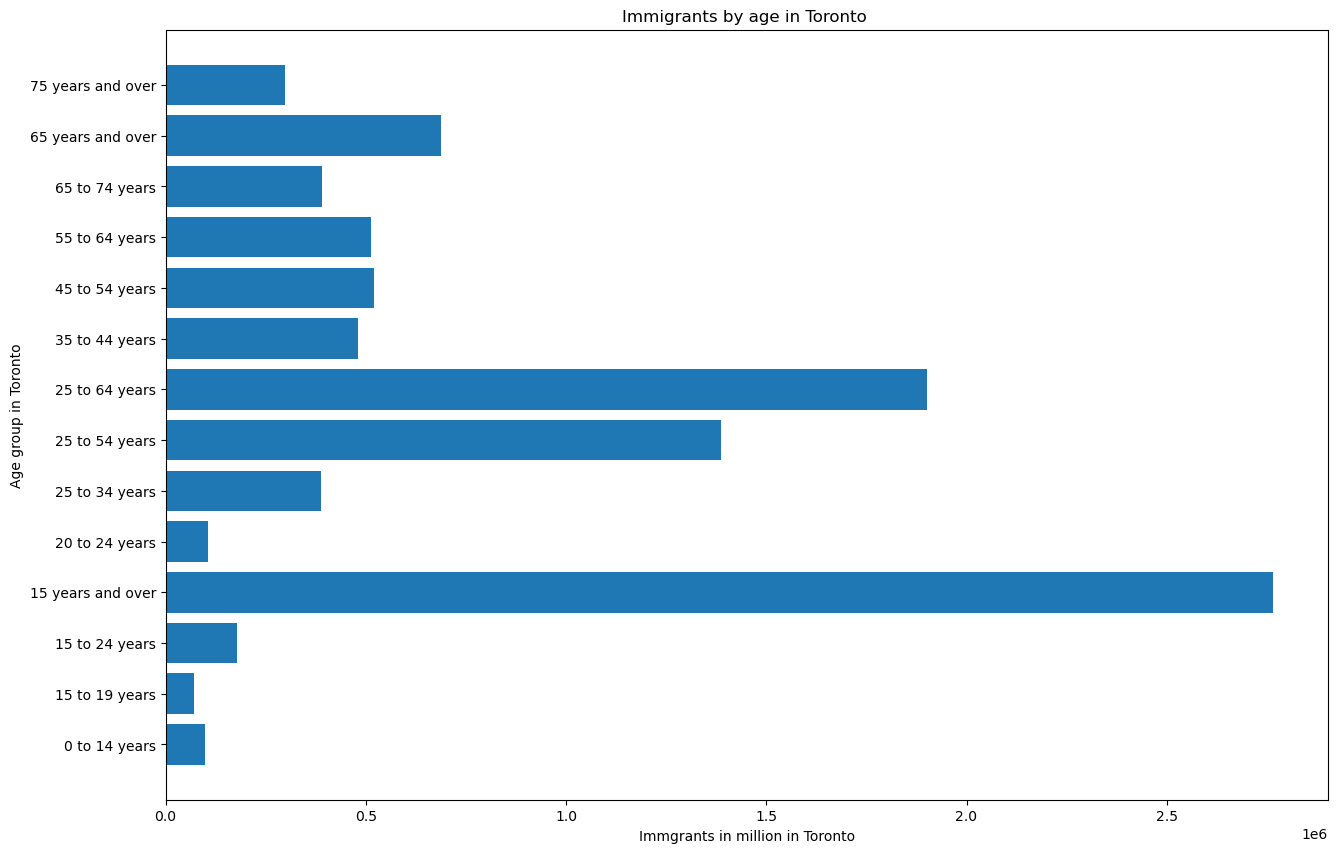

In [90]:
age = df5["Age"]
Immigrants = df5["Immigrants"]

fig = plt.figure(figsize=(15,10))
plt.barh(age,Immigrants)
plt.xlabel("Immgrants in million in Toronto")
plt.ylabel("Age group in Toronto")
plt.title("Immigrants by age in Toronto ")

Text(0.5, 1.0, 'Non-immigrants by age in Toronto ')

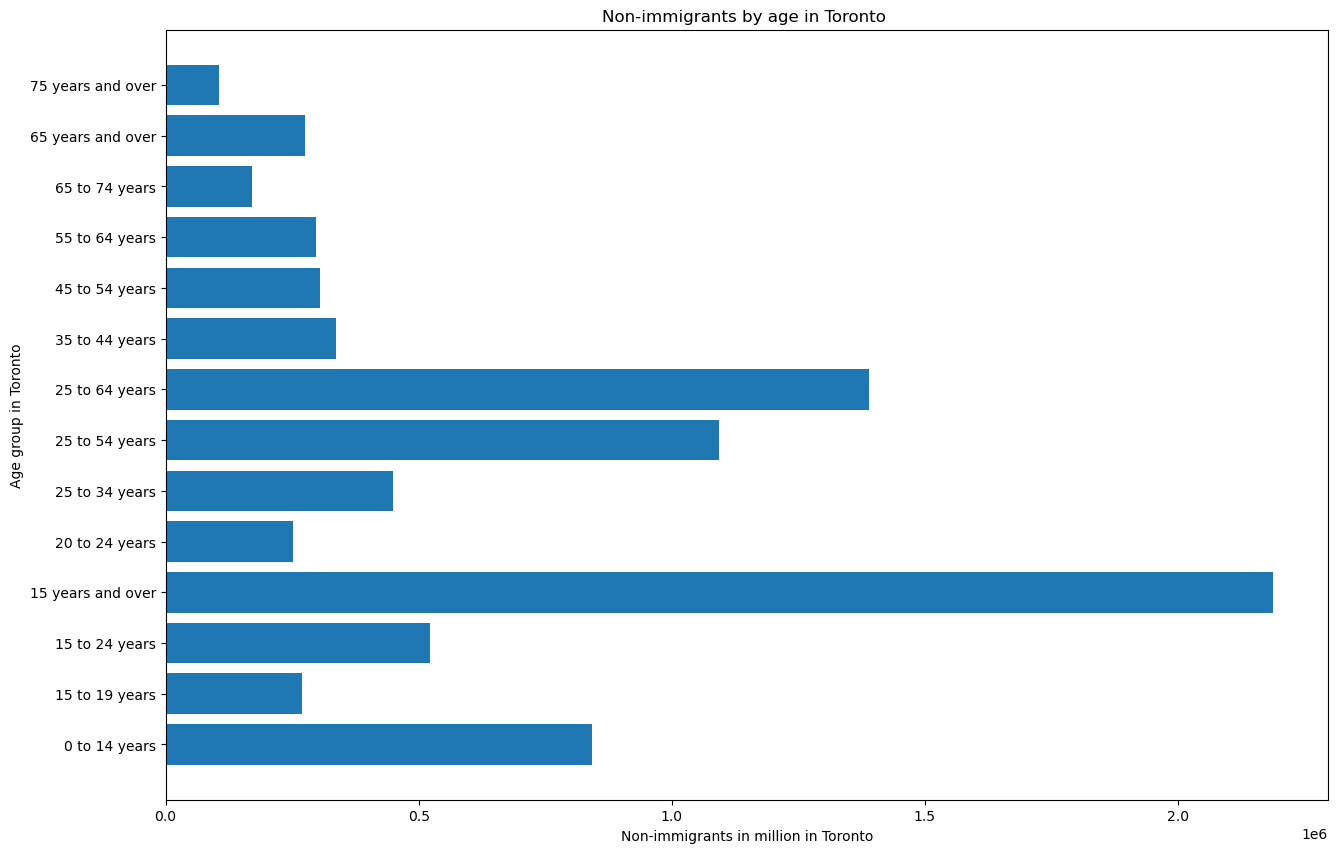

In [94]:
age = df5["Age"]
Immigrants = df5["Non-immigrants"]

fig = plt.figure(figsize=(15,10))
plt.barh(age,Immigrants)
plt.xlabel("Non-immigrants in million in Toronto")
plt.ylabel("Age group in Toronto")
plt.title("Non-immigrants by age in Toronto ")

In [91]:
df6 = df3[df3['Regions'].str.contains('Ottawa') == True]
df6

,Regions,Age,Total - Immigrant status and period of immigration,Non-immigrants,Immigrants,Before 2001,2001 to 2005,2006 to 2010,2011 to 2015,2016 to 2021,Non-permanent residents
364,"Ottawa - Gatineau (Ontario part) (CMA), Ont.",0 to 14 years,"186,910","167,865","15,240",0,0,"1,120","3,880","10,240","3,805"
365,"Ottawa - Gatineau (Ontario part) (CMA), Ont.",15 to 19 years,"66,160","54,755","9,390",0,940,"2,475","2,950","3,030","2,010"
366,"Ottawa - Gatineau (Ontario part) (CMA), Ont.",15 to 24 years,"141,735","110,940","20,825",955,"3,695","5,015","5,395","5,760","9,970"
367,"Ottawa - Gatineau (Ontario part) (CMA), Ont.",15 years and over,"929,885","652,065","251,820","129,360","27,750","28,605","28,170","37,935","25,995"
368,"Ottawa - Gatineau (Ontario part) (CMA), Ont.",20 to 24 years,"75,575","56,175","11,440",955,"2,765","2,540","2,450","2,735","7,960"
369,"Ottawa - Gatineau (Ontario part) (CMA), Ont.",25 to 34 years,"155,875","111,330","35,290","7,580","4,250","4,540","5,275","13,655","9,250"
370,"Ottawa - Gatineau (Ontario part) (CMA), Ont.",25 to 54 years,"452,455","308,245","129,050","45,275","17,750","18,535","19,050","28,435","15,160"
371,"Ottawa - Gatineau (Ontario part) (CMA), Ont.",25 to 64 years,"605,290","417,690","171,955","77,800","21,540","21,500","20,945","30,175","15,640"
372,"Ottawa - Gatineau (Ontario part) (CMA), Ont.",35 to 44 years,"149,060","99,090","45,880","13,165","5,000","7,720","9,020","10,985","4,090"
373,"Ottawa - Gatineau (Ontario part) (CMA), Ont.",45 to 54 years,"147,525","97,825","47,880","24,525","8,510","6,285","4,760","3,795","1,825"


Text(0.5, 1.0, 'Immigrants by age in Ottawa ')

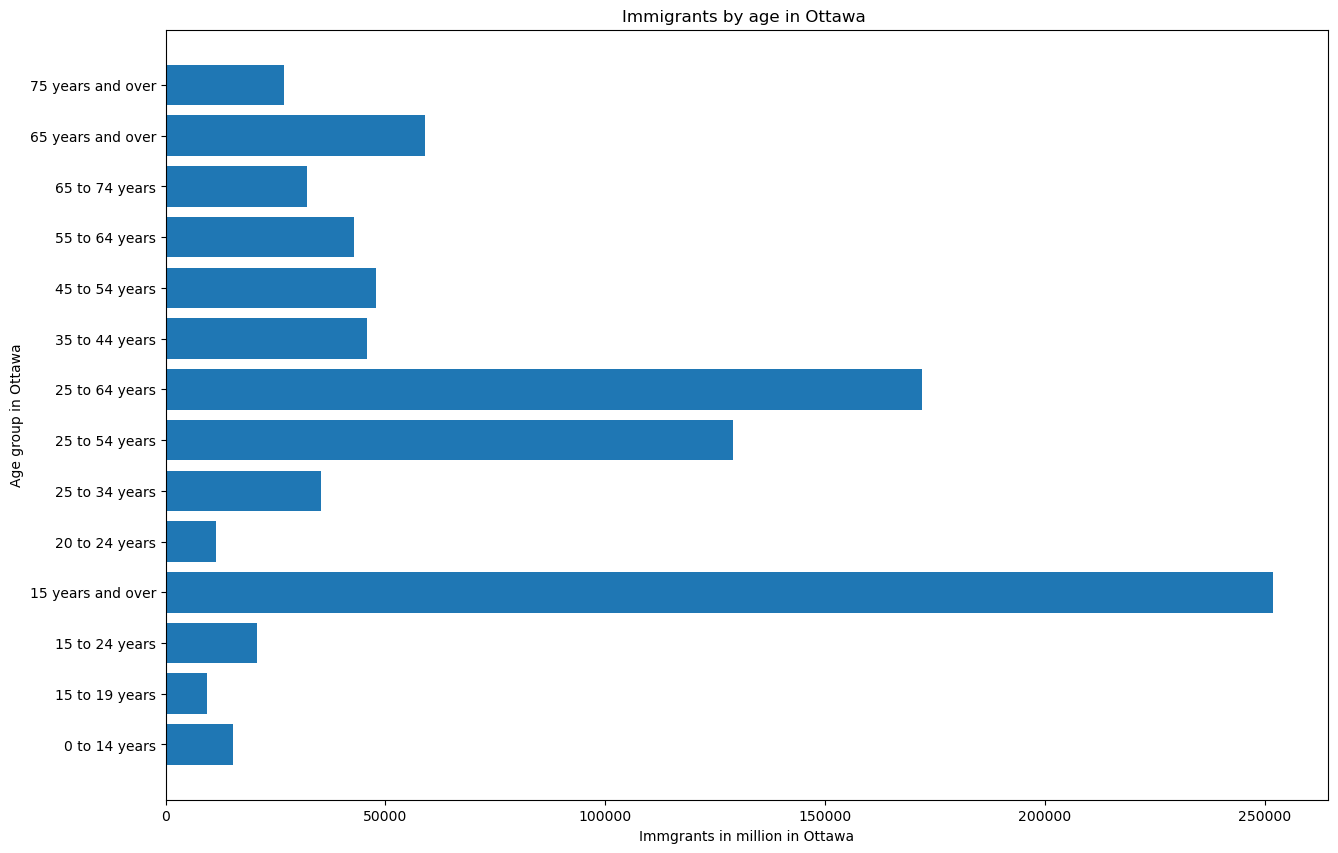

In [92]:
age = df6["Age"]
Immigrants = df6["Immigrants"]

fig = plt.figure(figsize=(15,10))
plt.barh(age,Immigrants)
plt.xlabel("Immgrants in million in Ottawa")
plt.ylabel("Age group in Ottawa")
plt.title("Immigrants by age in Ottawa ")

Text(0.5, 1.0, 'Non-immigrants by age in Ottawa ')

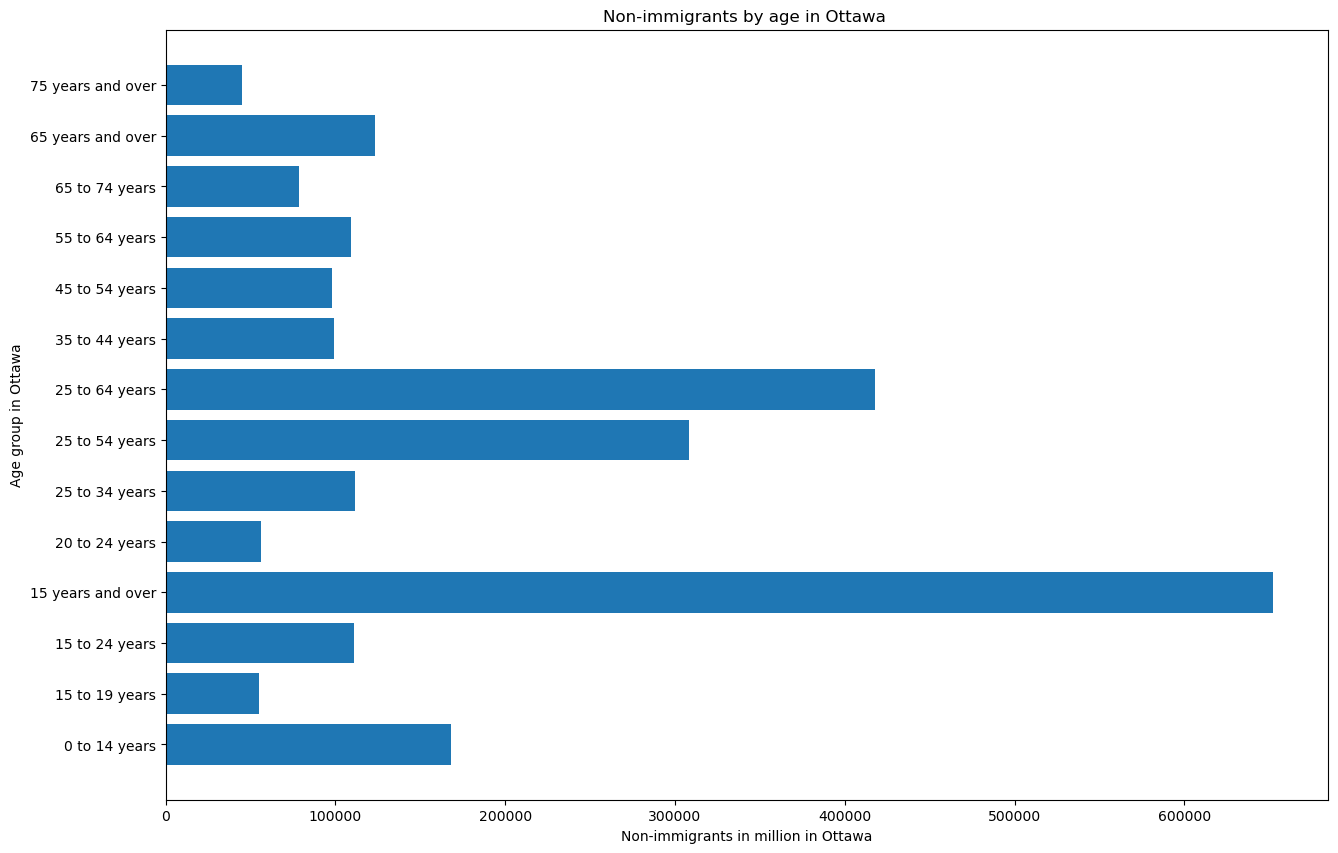

In [93]:
age = df6["Age"]
Immigrants = df6["Non-immigrants"]

fig = plt.figure(figsize=(15,10))
plt.barh(age,Immigrants)
plt.xlabel("Non-immigrants in million in Ottawa")
plt.ylabel("Age group in Ottawa")
plt.title("Non-immigrants by age in Ottawa ")